# Welcome to the Google Play Store Apps Study!

Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — 
1. Data Cleaning
2. Most Popular App Category
3. App with largest number of installs
4. App with large number of reviews
5. Mean Ratings
6. Paid vs Free Apps analysis
7. Data Visulaization
8. Insight Generation

### Let's get started!

<b>Import Libraries </b>

In [2]:
# Import necessary libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import csv data file.
df = pd.read_csv("googleplaystore.csv", header = 0)
df.head()
df.info()
#print (df.describe())
#print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*From dataframe information above it is observed that some of the columns are wrongly objectified, like Reviews, Size, Installs etc*

### Data Cleaning 

### Clean Reviews Column

In [5]:
# Row no. 10472 is having wrong values in almost all columns so drop this row.
df.drop(10472,axis = 0,inplace = True)

In [6]:
df["Reviews"] = df["Reviews"].astype('float')

### Clean Rating Column

In [7]:
trash_data = df[df['Rating'] == "nan"]
df.drop(trash_data.index, inplace=True)
df["Rating"] = df["Rating"].astype(float)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Clean Size Column

In [8]:
trash_data = df[df['Size'] == "Varies with device"]
df.drop(trash_data.index, inplace=True)

df["Size"] = df["Size"].apply(lambda x: str(x).strip('M').replace('M', ''))
df["Size"] = df["Size"].apply(lambda x: str(x).strip('M').replace('k', ''))
df["Size"] = df["Size"].astype(float)

### Clean Installs Column

In [9]:
df["Installs"] = df["Installs"].apply(lambda x: str(x).strip('+').replace('+', ''))
df["Installs"] = df["Installs"].apply(lambda x: str(x).strip(',').replace(',', '')).astype(int)

### Clean Price Column

In [10]:
df["Price"] = df["Price"].apply(lambda x: str(x).strip('$').replace('$', ''))
df["Price"] = df["Price"].astype(float)

### Clean Content Rating Column

In [11]:
trash_data = df[df["Content Rating"] == "Unrated"]
df.drop(trash_data.index, inplace=True)

### Clean Current Ver Column

In [12]:
trash_data = df[df["Current Ver"] == "Varies with device"]
df.drop(trash_data.index, inplace=True)
trash_data = df[df["Current Ver"] == "nan"]
df.drop(trash_data.index, inplace=True)

### Clean Android Ver Column

In [13]:
trash_data = df[df["Android Ver"] == "Varies with device"]
df.drop(trash_data.index, inplace=True)
trash_data = df[df["Android Ver"] == "nan"]
df.drop(trash_data.index, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9057 entries, 0 to 10838
Data columns (total 13 columns):
App               9057 non-null object
Category          9057 non-null object
Rating            7642 non-null float64
Reviews           9057 non-null float64
Size              9057 non-null float64
Installs          9057 non-null int64
Type              9057 non-null object
Price             9057 non-null float64
Content Rating    9057 non-null object
Genres            9057 non-null object
Last Updated      9057 non-null object
Current Ver       9049 non-null object
Android Ver       9055 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 990.6+ KB


## Most Popular App Category

In [4]:
df_cat = pd.DataFrame(df['Category'].value_counts())
print(df_cat)

                     Category
FAMILY                   1972
GAME                     1144
TOOLS                     843
MEDICAL                   463
BUSINESS                  460
PRODUCTIVITY              424
PERSONALIZATION           392
COMMUNICATION             387
SPORTS                    384
LIFESTYLE                 382
FINANCE                   366
HEALTH_AND_FITNESS        341
PHOTOGRAPHY               335
SOCIAL                    295
NEWS_AND_MAGAZINES        283
SHOPPING                  260
TRAVEL_AND_LOCAL          258
DATING                    234
BOOKS_AND_REFERENCE       231
VIDEO_PLAYERS             175
EDUCATION                 156
ENTERTAINMENT             149
MAPS_AND_NAVIGATION       137
FOOD_AND_DRINK            127
HOUSE_AND_HOME             88
AUTO_AND_VEHICLES          85
LIBRARIES_AND_DEMO         85
WEATHER                    82
ART_AND_DESIGN             65
EVENTS                     64
COMICS                     60
PARENTING                  60
BEAUTY    

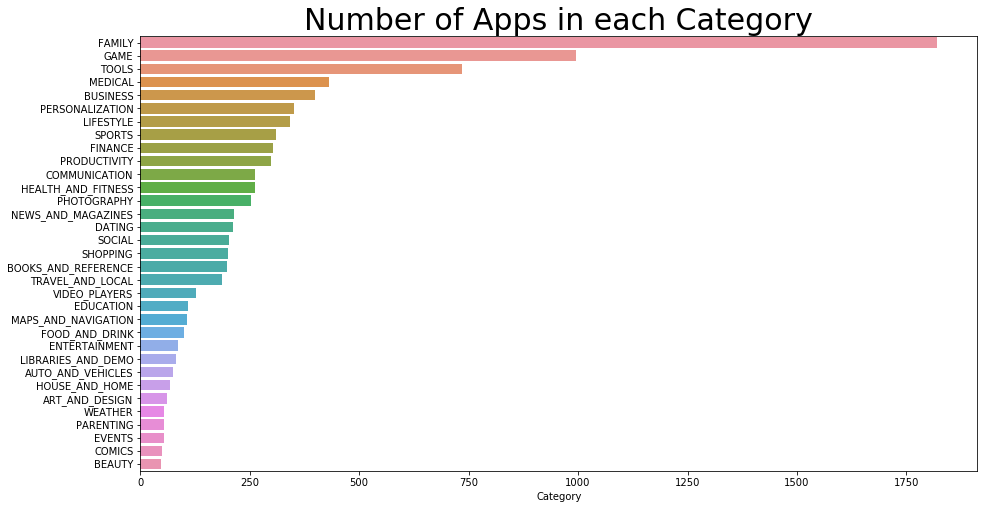

In [15]:
fig = plt.figure(figsize = (15,8))
fig = sns.barplot(df_cat['Category'],df_cat.index)
plt.title('Number of Apps in each Category',size = 30)
plt.show()

### Insight : Family Category have higest number of Apps (1972) available, followed by Game (1144) and Tools (843).

## App with largest number of installs

In [6]:
data_cat_wrt_downloads = df[['Category','Installs']].groupby('Category').sum().sort_values('Installs',ascending = False)

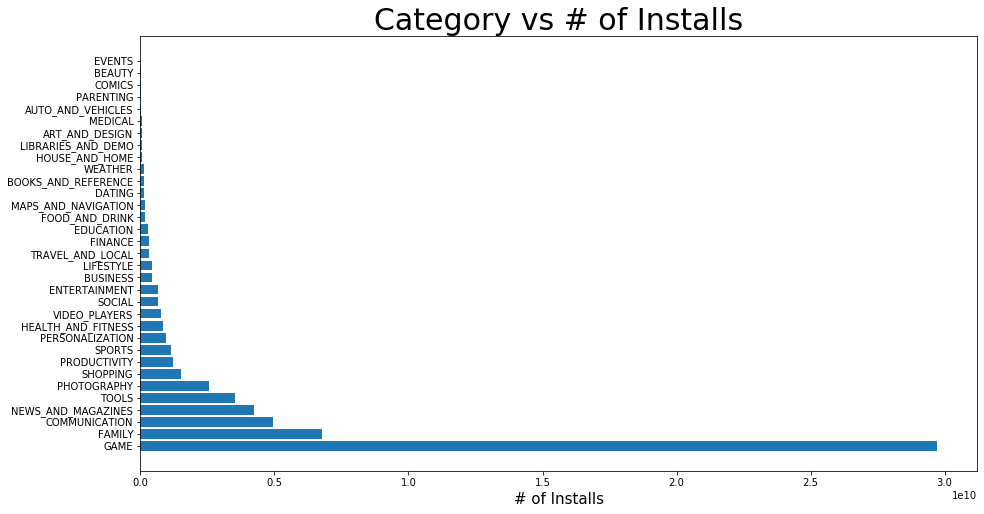

In [17]:
fig = plt.figure(figsize = (15,8))
fig = plt.barh(data_cat_wrt_downloads.index,data_cat_wrt_downloads['Installs'])
plt.title('Category vs # of Installs',size = 30)
plt.xlabel('# of Installs',size = 15)
plt.show()

### Insight: "Game" category have highest number of Apps installation followed by Family and Communication.

## Category and Mean Ratings

In [18]:
data_cat_wrt_reviews = df[['Category','Rating']].groupby('Category').mean().sort_values('Rating',ascending = False)

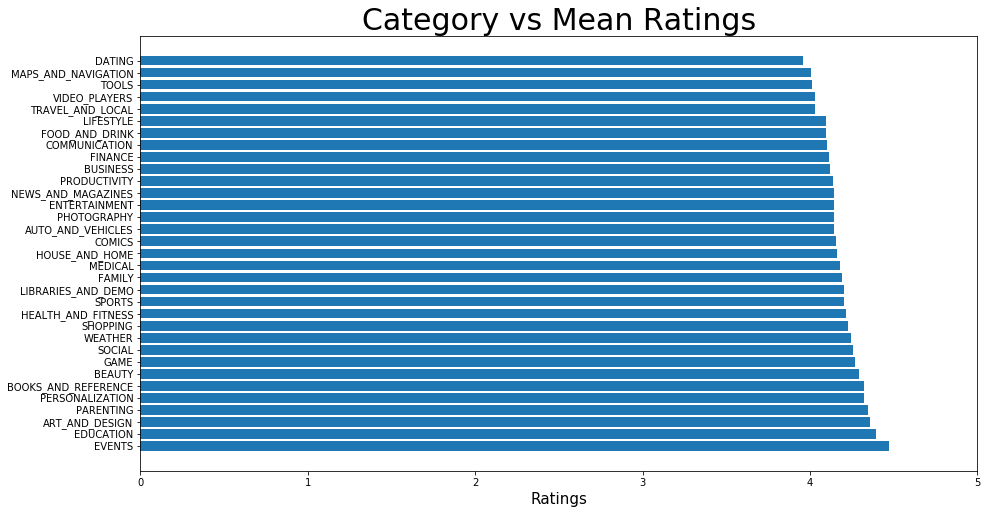

In [19]:
fig = plt.figure(figsize = (15,8))
fig = plt.barh(data_cat_wrt_reviews.index,data_cat_wrt_reviews['Rating'])
plt.title('Category vs Mean Ratings',size = 30)
plt.xlabel('Ratings',size = 15)
plt.xticks(np.linspace(0,5,6))
plt.show()

### Category "Events" have highest mean rating, followed by Education and Art & Design.

## App Count by Content Rating 

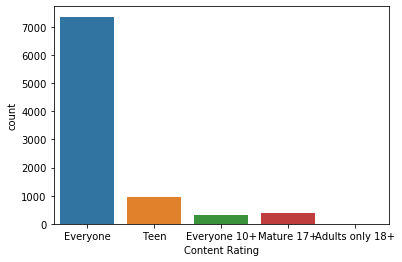

In [26]:
sns.countplot('Content Rating',data=df)
plt.show()


## App Count by App Type (Free vs Paid)

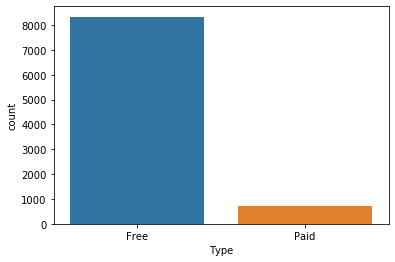

In [27]:
sns.countplot('Type',data=df)
plt.show()

## Most reviewed App

In [30]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df.sort_values('Reviews',ascending=False).iloc[0]['App']

'Clash of Clans'

## Top 10 apps having highest installs

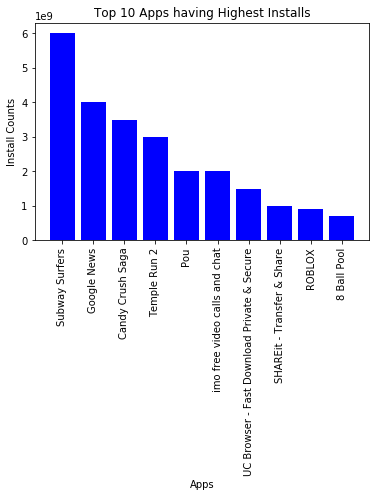

In [31]:
df['Installs'] = df['Installs'].astype(int)
res = df.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()